In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_partregress_grid
import matplotlib.pyplot as plt
%matplotlib inline

/Users/wangtian/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Description of this Script

This script includes core and additional analyses for the STATS506 group project:
Does working overtime predict abnormal blood pressure?

### Data Preprocessing

### download the data

In [3]:
# download all the relevant data within the years of 2015 - 2016
demog15 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.XPT')
bp15 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.XPT')
bm15 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.XPT')
alc15 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/ALQ_I.XPT')
occupation15 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/OCQ_I.XPT')
sleep15 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SLQ_I.XPT')
smoke15 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/SMQRTU_I.XPT')
take_pre15 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPQ_I.XPT')

In [4]:
# download all the relevant data within the years of 2013 - 2014
demog13 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/DEMO_H.XPT')
bp13 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/BPX_H.XPT')
bm13 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/BMX_H.XPT')
alc13 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/ALQ_H.XPT')
occupation13 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/OCQ_H.XPT')
sleep13 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/SLQ_H.XPT')
smoke13 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/SMQRTU_H.XPT')
take_pre13 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/BPQ_H.XPT')

In [5]:
# download all the relevant data within the years of 2011 - 2012
demog11 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/DEMO_G.XPT')
bp11 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/BPX_G.XPT')
bm11 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/BMX_G.XPT')
alc11 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/ALQ_G.XPT')
occupation11 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/OCQ_G.XPT')
sleep11 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/SLQ_G.XPT')
smoke11 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/SMQRTU_G.XPT')
take_pre11 = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2011-2012/BPQ_G.XPT')

### merge the data

In [6]:
# merge the data of the years of 2015 - 2016
dt15 = pd.merge(demog15, bp15, on='SEQN', how='inner')
dt15 = pd.merge(dt15, bm15, on='SEQN', how='inner')
dt15 = pd.merge(dt15, alc15, on='SEQN', how='inner')
dt15 = pd.merge(dt15, occupation15, on='SEQN', how='inner')
dt15 = pd.merge(dt15, sleep15, on='SEQN', how='inner')
dt15 = pd.merge(dt15, smoke15, on='SEQN', how='inner')
dt15 = pd.merge(dt15, take_pre15, on='SEQN', how='inner')
# dt15

In [7]:
# merge the data of the years of 2013 - 2014
dt13 = pd.merge(demog13, bp13, on='SEQN', how='inner')
dt13 = pd.merge(dt13, bm13, on='SEQN', how='inner')
dt13 = pd.merge(dt13, alc13, on='SEQN', how='inner')
dt13 = pd.merge(dt13, occupation13, on='SEQN', how='inner')
dt13 = pd.merge(dt13, sleep13, on='SEQN', how='inner')
dt13 = pd.merge(dt13, smoke13, on='SEQN', how='inner')
dt13 = pd.merge(dt13, take_pre13, on='SEQN', how='inner')
# dt13

In [8]:
# merge the data of the years of 2011 - 2012
dt11 = pd.merge(demog11, bp11, on='SEQN', how='inner')
dt11 = pd.merge(dt11, bm11, on='SEQN', how='inner')
dt11 = pd.merge(dt11, alc11, on='SEQN', how='inner')
dt11 = pd.merge(dt11, occupation11, on='SEQN', how='inner')
dt11 = pd.merge(dt11, sleep11, on='SEQN', how='inner')
dt11 = pd.merge(dt11, smoke11, on='SEQN', how='inner')
dt11 = pd.merge(dt11, take_pre11, on='SEQN', how='inner')
# dt11

### data cleaning

In [9]:
# define a function to transfer the alcohol frequency within different time periods to the weekly alcohol frequency
def avg_alcohol_freq_wk_cond(df):
    if df.time_period == 1.0:
        return df.alcohol_freq
    elif df.time_period == 2.0:
        return df.alcohol_freq / 4.345   # 4.345 weeks per month
    elif df.time_period == 3.0:
        return df.alcohol_freq / 52.143   # 52.143 weeks per year

In [10]:
# 2015 - 2016
# limit the age ranges to: 18 - 60 and eliminate the non-working group 
# and eliminate people who are now taking prescriptions for hyper-blood-pressure
dt15 = dt15[(dt15.RIDAGEYR >= 18) & (dt15.RIDAGEYR <= 60) & (dt15.OCD150 == 1) & (dt15.BPQ050A != 1)]
# drop the oberservations who don't have information about whether they take prescription or not
dt15 = dt15.dropna(subset=['BPQ050A'])
# choose the variables interested 
dt15 = dt15[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'BMXBMI', 
           'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BPXSY3', 'BPXDI3', 'BPXSY4', 'BPXDI4',
           'ALQ120Q', 'ALQ120U', 'SLD012', 'SMQ681', 'OCQ180']]
# rename the variables
dt15 = dt15.rename(columns={'SEQN': 'id', 'RIAGENDR': 'gender', 'RIDAGEYR': 'age',
                            'RIDRETH3': 'race', 'BMXBMI': 'bmi', 'ALQ120Q': 'alcohol_freq', 'ALQ120U': 'time_period',
                            'SLD012': 'sleep', 'SMQ681': 'smoke', 'OCQ180': 'workhrs'})
# apply the function defined above
dt15['avg_alcohol_freq_wk'] = dt15.apply(avg_alcohol_freq_wk_cond, axis=1)
# drop the columns alcohol_freq and time_period which are not needed anymore
dt15 = dt15.drop(['alcohol_freq', 'time_period'], axis = 1)
# eliminate the missing values
dt15 = dt15.dropna(subset = dt15.columns[np.r_[0:5, 13:17]])
dt15 = dt15.dropna(thresh = 15)
# dt15

In [11]:
# 2013 - 2014
# limit the age ranges to: 18 - 60 and eliminate the non-working group 
# and eliminate people who are now taking prescriptions for hyper-blood-pressure
dt13 = dt13[(dt13.RIDAGEYR >= 18) & (dt13.RIDAGEYR <= 60) & (dt13.OCD150 == 1) & (dt13.BPQ050A != 1)]
# drop the oberservations who don't have information about whether they take prescription or not
dt13 = dt13.dropna(subset=['BPQ050A'])
# choose the variables interested 
dt13 = dt13[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'BMXBMI', 
           'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BPXSY3', 'BPXDI3', 'BPXSY4', 'BPXDI4',
           'ALQ120Q', 'ALQ120U', 'SLD010H', 'SMQ681', 'OCQ180']]
# rename the variables
dt13 = dt13.rename(columns={'SEQN': 'id', 'RIAGENDR': 'gender', 'RIDAGEYR': 'age',
                            'RIDRETH3': 'race', 'BMXBMI': 'bmi', 'ALQ120Q': 'alcohol_freq', 'ALQ120U': 'time_period',
                            'SLD010H': 'sleep', 'SMQ681': 'smoke', 'OCQ180': 'workhrs'})
# apply the function defined above
dt13['avg_alcohol_freq_wk'] = dt13.apply(avg_alcohol_freq_wk_cond, axis=1)
# drop the columns alcohol_freq and time_period which are not needed anymore
dt13 = dt13.drop(['alcohol_freq', 'time_period'], axis = 1)
# eliminate the missing values
dt13 = dt13.dropna(subset = dt13.columns[np.r_[0:5,13:17]])
dt13 = dt13.dropna(thresh = 15)
# dt13

In [12]:
# 2011 - 2012
# limit the age ranges to: 18 - 60 and eliminate the non-working group 
# and eliminate people who are now taking prescriptions for hyper-blood-pressure
dt11 = dt11[(dt11.RIDAGEYR >= 18) & (dt11.RIDAGEYR <= 60) & (dt11.OCD150 == 1) & (dt11.BPQ050A != 1)]
# drop the oberservations who don't have information about whether they take prescription or not
dt11 = dt11.dropna(subset=['BPQ050A'])
# choose the variables interested 
dt11 = dt11[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH3', 'BMXBMI', 
           'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BPXSY3', 'BPXDI3', 'BPXSY4', 'BPXDI4',
           'ALQ120Q', 'ALQ120U', 'SLD010H', 'SMQ680', 'OCQ180']]
# rename the variables
dt11 = dt11.rename(columns={'SEQN': 'id', 'RIAGENDR': 'gender', 'RIDAGEYR': 'age',
                            'RIDRETH3': 'race', 'BMXBMI': 'bmi', 'ALQ120Q': 'alcohol_freq', 'ALQ120U': 'time_period',
                            'SLD010H': 'sleep', 'SMQ680': 'smoke', 'OCQ180': 'workhrs'})
# apply the function defined above
dt11['avg_alcohol_freq_wk'] = dt11.apply(avg_alcohol_freq_wk_cond, axis=1)
# drop the columns alcohol_freq and time_period which are not needed anymore
dt11 = dt11.drop(['alcohol_freq', 'time_period'], axis = 1)
# eliminate the missing values
dt11 = dt11.dropna(subset = dt11.columns[np.r_[0:5,13:17]])
dt11 = dt11.dropna(thresh = 15)
# dt11

In [13]:
# append the data frames from all the years into one data frame
full_dt = dt15.append(dt13, ignore_index=True)
full_dt = full_dt.append(dt11, ignore_index=True)
# full_dt

In [68]:
# compute the mean systolic blood pressure and the mean diatolic blood pressure of all the 4 trials
full_dt['avg_BPXSY'] = full_dt.iloc[:, [5, 7, 9, 11]].mean(axis = 1)
full_dt['avg_BPXDI'] = full_dt.iloc[:, [6, 8, 10, 12]].mean(axis = 1)
full_dt = full_dt.drop(full_dt.columns[5:13], axis=1)
# full_dt

In [69]:
# convert the variable working hours into a binary variable
full_dt.workhrs = np.where(full_dt.workhrs > 40.0, 1, 0)
# if the original gender variable == 1, tranfer it to 0
# otherwise, 1
full_dt.gender = np.where(full_dt.gender == 1, 0, 1)
# if the original smoke variable == 1, tranfer it to 1
# otherwise, 0
full_dt.smoke = np.where(full_dt.smoke == 1, 1, 0)

In [70]:
full_dt.head()

,id,gender,age,race,bmi,sleep,smoke,workhrs,avg_alcohol_freq_wk,avg_BPXSY,avg_BPXDI
0,83747.0,0,46.0,3.0,27.6,10.0,1,0,6.000000,148.000000,92.000000
1,83891.0,1,54.0,3.0,38.8,8.0,0,0,0.920598,119.333333,79.333333
2,84046.0,1,45.0,3.0,33.2,8.0,0,1,6.000000,128.666667,91.333333
3,84089.0,0,53.0,3.0,23.3,7.0,1,0,2.000000,146.666667,67.333333
4,84119.0,0,52.0,6.0,27.2,8.0,0,0,1.000000,183.333333,112.000000


In [71]:
full_dt.to_csv("cleaned_data.csv")

## Core Analysis

As we have got a nice cleaned dataset, we want to visualize our data with pair plots first. 

### pair plots

#### systolic blood pressure

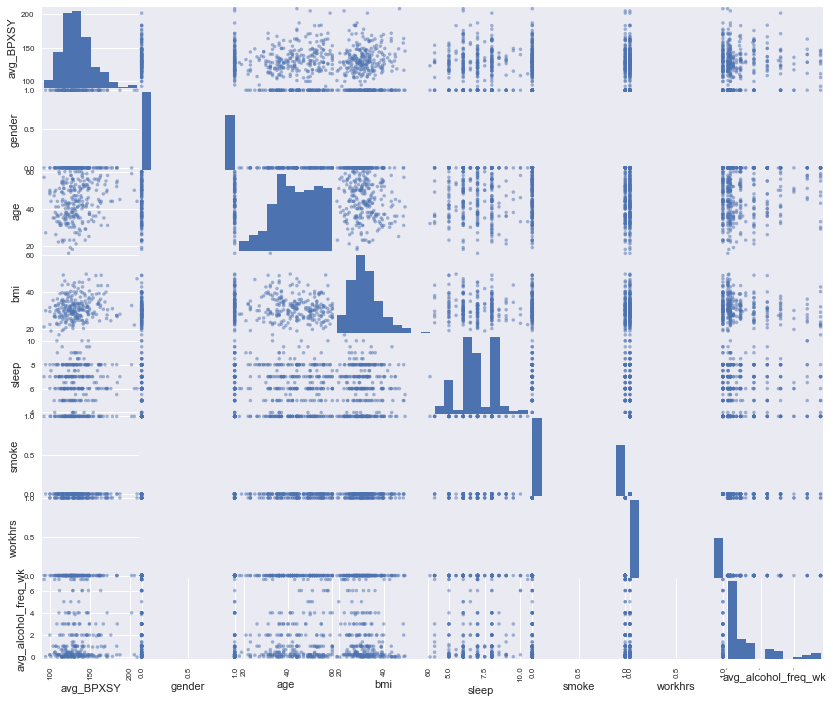

In [72]:
pair_plot_data_sys_bp = full_dt[['avg_BPXSY', 'gender', 'age', 'bmi', 'sleep', 
                                 'smoke', 'workhrs', 'avg_alcohol_freq_wk']]
ax = pd.plotting.scatter_matrix(pair_plot_data_sys_bp, alpha = 0.5, figsize = (14, 12)); 
plt.xticks(fontsize = 2)
plt.yticks(fontsize = 2);

#### diatolic blood pressure

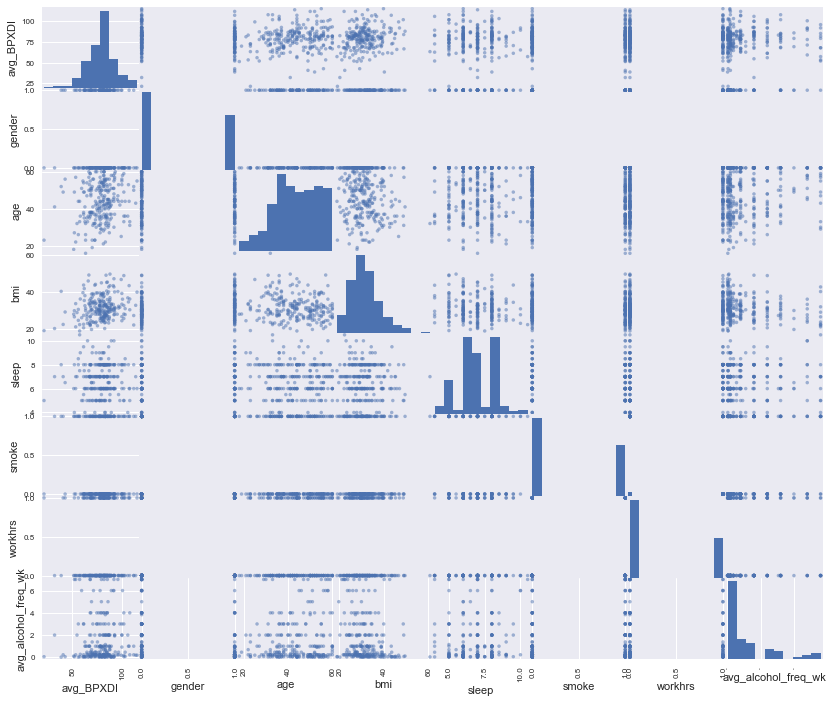

In [73]:
pair_plot_data_dia_bp = full_dt[['avg_BPXDI', 'gender', 'age', 'bmi', 'sleep', 
                                 'smoke', 'workhrs', 'avg_alcohol_freq_wk']]
pd.plotting.scatter_matrix(pair_plot_data_dia_bp, alpha = 0.5, figsize = (14, 12)) 
plt.xticks(fontsize = 2)
plt.yticks(fontsize = 2);

As shown in the pair plots for the systolic blood pressure, specifically from the scatter plots, we can find that there are weak relations or almost no relations between the variables. Moreover, from the histograms, we can find that the all the variables seem not to be normally distributed. Athough the variable systolic blood pressure and the variable bmi approach to be normally distributed, they are still right skewed. In addition, as shown in the pair plots for the diatolic blood pressure, from the scatter plots, again, we can find that there are weak relations or almost no relations between the variables. Also, from the histograms, except that the variable diatolic blood pressure seems to be almost normally distributed (only a little bit left skewed), all the other variables are not normally distributed.

### fit the models

After exploring the data through vizualizing with pair plots, we fit our linear regression models.

#### systolic blood pressure

For the systolic blood pressure, we fit the model: 
$$
\begin{aligned}
 y &= \beta_{0} + \beta_{workhrs}*x_{workhrs} + \beta_{gender}*x_{gender} + \beta_{age}*x_{age} + \beta_{bmi}*x_{bmi} \notag\\
 &+ \beta_{sleep}*x_{sleep} + \beta_{smoke}*x_{smoke} + \beta_{avg\_alcohol\_freq\_wk}*x_{avg\_alcohol\_freq\_wk} + \epsilon
\end{aligned}
$$

In [74]:
model_formula_sys_bp = 'avg_BPXSY ~ gender + age + bmi + sleep + smoke + workhrs + avg_alcohol_freq_wk'
model_sys_bp = smf.ols(formula = model_formula_sys_bp, data = full_dt)
model_fit_sys_bp = model_sys_bp.fit()

In [75]:
print(model_fit_sys_bp.summary())

                            OLS Regression Results                            
Dep. Variable:              avg_BPXSY   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3.192
Date:                Thu, 05 Dec 2019   Prob (F-statistic):            0.00303
Time:                        13:55:19   Log-Likelihood:                -1037.0
No. Observations:                 238   AIC:                             2090.
Df Residuals:                     230   BIC:                             2118.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              90.2929    

#### diatolic blood pressure

And for diatolic blood pressure, we fit the model: 
$$
\begin{aligned}
 y &= \beta_{0} + \beta_{workhrs}*x_{workhrs} + \beta_{gender}*x_{gender} + \beta_{age}*x_{age} + \beta_{bmi}*x_{bmi} \notag\\
 &+ \beta_{sleep}*x_{sleep} +  \beta_{smoke}*x_{smoke} + \beta_{avg\_alcohol\_freq\_wk}*x_{avg\_alcohol\_freq\_wk} + \epsilon
\end{aligned}
$$

In [76]:
model_formula_dia_bp = 'avg_BPXDI ~ gender + age + bmi + sleep + smoke + workhrs + avg_alcohol_freq_wk'
model_dia_bp = smf.ols(formula = model_formula_dia_bp, data = full_dt)
model_fit_dia_bp = model_dia_bp.fit()

In [77]:
print(model_fit_dia_bp.summary())

                            OLS Regression Results                            
Dep. Variable:              avg_BPXDI   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3.347
Date:                Thu, 05 Dec 2019   Prob (F-statistic):            0.00204
Time:                        13:55:19   Log-Likelihood:                -954.08
No. Observations:                 238   AIC:                             1924.
Df Residuals:                     230   BIC:                             1952.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              49.4133    

From the summary results of the linear regression model for the systolic blood pressure, we can find that although the coefficient of the working hours is positive, which implies that working overtime increases the risk of high systolic blood pressure, this effect is not significant ($\hat{\beta_{workhrs}} = 1.58$, p = 0.557). As a result, we can conclude that working overtime cannot lead to abnormal systolic blood pressure. Besides, from the summary results of the linear regression model for the diatolic blood pressure, we can find that although the coefficient of the working hours is positive as well, which implies that working overtime increases the risk of high diatolic blood pressure too, this effect is not significant as well ($\hat{\beta_{workhrs}} = 0.2246$, p = 0.905). As a result, we can conclude that working overtime also cannot lead to abnormal diatolic blood pressure. Therefore, in conclusion, working overtime also cannot lead to abnormal blood pressure.

### diagnostics

After fitting the linear regression model, we want to check whether the following assumptions of the linear regression model are held:

1. Homoscedasticity: The variance of the residual is constant. 
2. Linearity: The relationship between between the independent and dependent variables is linear.
3. No or little multicollinearity: There is no or little collinearity between independent variables.

### 1. Homoscedasticity

### residual plot

In order to check the homoscedasticity assumption, we plotted residual plots for both systolic blood pressure and diatolic pressure.

#### systolic blood pressure

In [78]:
# fitted values (need a constant term for intercept)
model_fitted_y_sys_bp = model_fit_sys_bp.fittedvalues

# model residuals
model_resid_sys_bp = model_fit_sys_bp.resid

# standardized residuals
model_std_resid_sys_bp = model_fit_sys_bp.get_influence().resid_studentized_internal

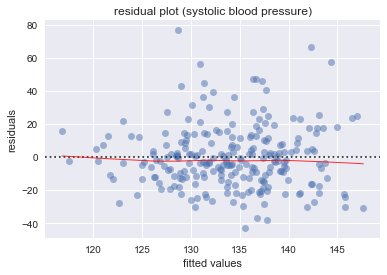

In [82]:
fig, ax = plt.subplots()
sns.residplot(model_fitted_y_sys_bp, model_resid_sys_bp, lowess = True,
              scatter_kws = {'alpha': 0.5}, 
              line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('residual plot (systolic blood pressure)')
ax.set_xlabel('fitted values')
ax.set_ylabel('residuals')

#### diatolic blood pressure

In [83]:
# fitted values (need a constant term for intercept)
model_fitted_y_dia_bp = model_fit_dia_bp.fittedvalues

# model residuals
model_resid_dia_bp = model_fit_dia_bp.resid

# standardized residuals
model_std_resid_dia_bp = model_fit_dia_bp.get_influence().resid_studentized_internal

# sqrt absolute standardized residuals
model_abs_sqrt_std_resid_dia_bp = np.sqrt(np.abs(model_std_resid_dia_bp))

# absolute residuals
model_abs_resid_dia_bp = np.abs(model_resid_dia_bp)

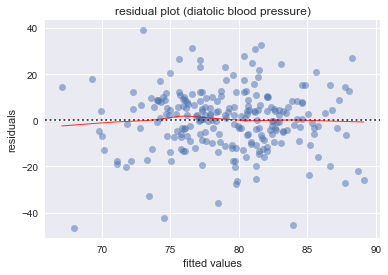

In [85]:
fig, ax = plt.subplots()
sns.residplot(model_fitted_y_dia_bp, model_resid_dia_bp, lowess = True,
              scatter_kws = {'alpha': 0.5}, 
              line_kws = {'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('residual plot (diatolic blood pressure)')
ax.set_xlabel('fitted values')
ax.set_ylabel('residuals')

From the residual plot of the systolic blood pressure, we can find the mean of the residual is almost 0, and the variance seems to be almost constant. Also, we have the same finds for the diatolic blood pressure. Therefore, the assumption of homoscedasticity can be considered as satisfied.

### 2. Linearity

In order to check the linearity assumption, we plotted partial regression plots for both systolic blood pressure and diatolic pressure against each of the independent variables.

### partial regression plots

#### systolic blood pressure

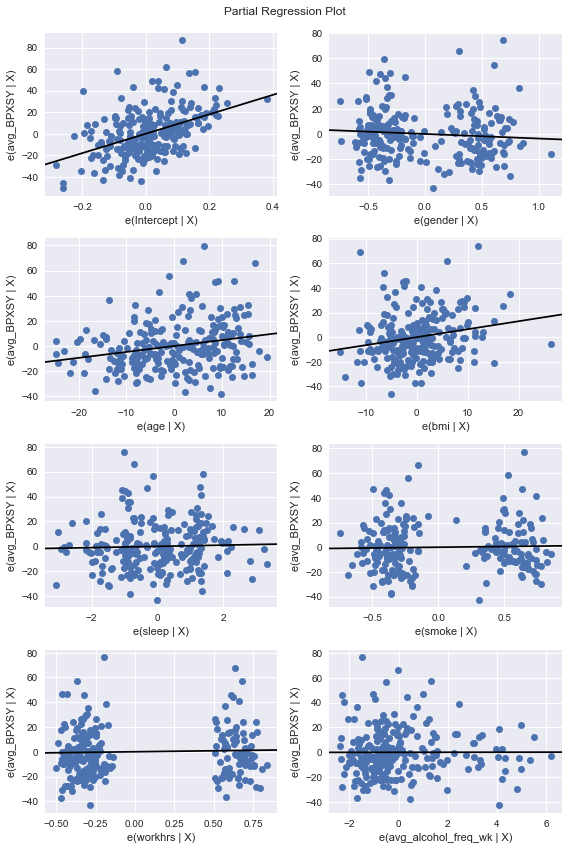

In [86]:
fig = plt.figure(figsize=(8, 12))
plot_partregress_grid(model_fit_sys_bp, fig=fig)
plt.show()

#### diatolic blood pressure

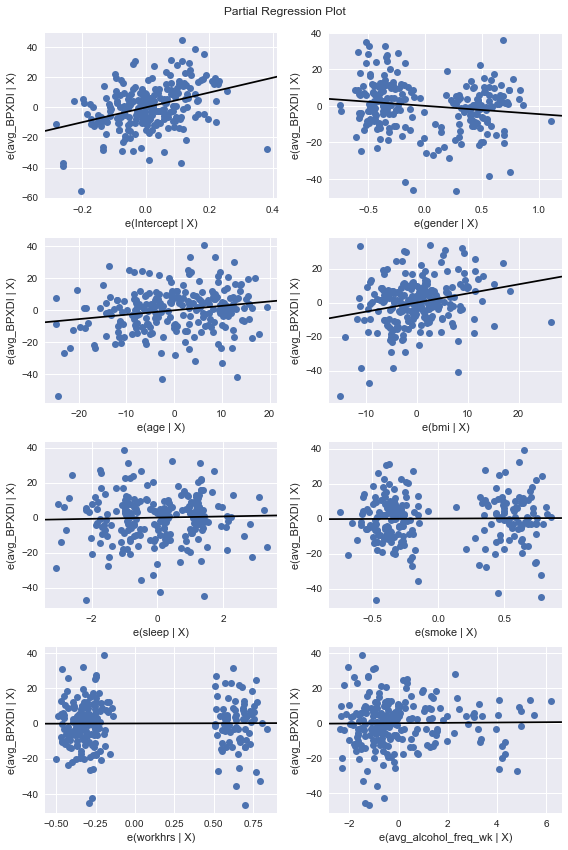

In [87]:
fig = plt.figure(figsize=(8, 12))
plot_partregress_grid(model_fit_dia_bp, fig=fig)
plt.show()

From the partial regression plots of the systolic blood pressure, we can find that for each of the independent variable, the expected value of the dependent variable (systolic blood pressure) is indeed a straight-line function of the independent variable, holding the others fixed. Also, from the partial regression plots of the diatolic blood pressurewe, we can get the same conclusion. Therefore, the assumption of linearity can be considered as satisfied.

### 3. No or little multicollinearity

In order to check the no/little-multicollinearity assumption, we computed the correlations between the continuous independent variables and the Pearson correlations between the binary independent variables.

#### check correlations between the continuous variables

In [88]:
continuous_vars = full_dt[['age', 'bmi', 'sleep', 'avg_alcohol_freq_wk']]
corr_continuous = np.corrcoef(continuous_vars.values.T)
# corr_continuous

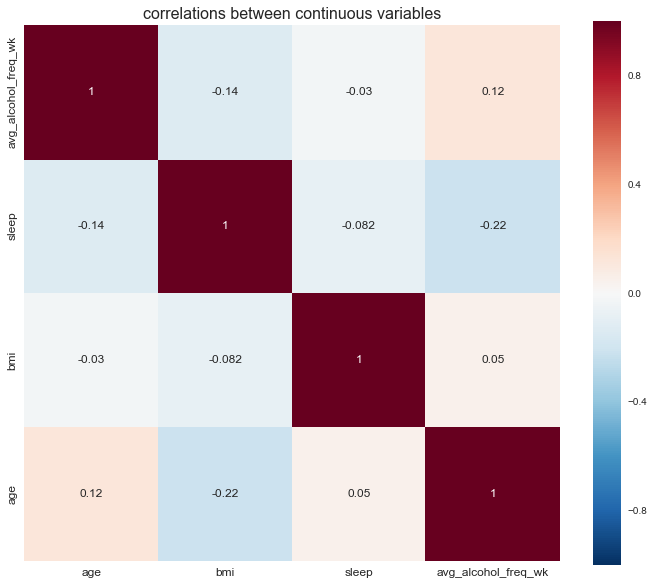

In [89]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_continuous, annot=True, square=True, annot_kws = {"size": 12})
plt.title("correlations between continuous variables", fontsize = 16)
ax.set_xticklabels(continuous_vars)
ax.set_yticklabels(continuous_vars, va = 'center')
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

#### check correlations between categorical variables

In [90]:
categorical_vars = full_dt[['gender', 'smoke', 'workhrs']]
categorical_vars.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson')

,gender,smoke,workhrs
gender,1.000000,0.123827,-0.077188
smoke,0.123827,1.000000,0.120028
workhrs,-0.077188,0.120028,1.000000


As shown in the heatmap of the correlations between the continuous independent variables, we can find that there are very small or almost no correlations between the continuous independent variables. Also, as the table of the Pearson correlations between the binary variables shows, we can find that there is little collinearity between each pair of the binary variables.

## Additional Analysis

To examine the effects of working overtime on the risk of abnormal blood pressure, we also conducted the logistic regression analysis. Abnormal blood pressure is defined as having systolic blood pressure higher than 140mm Hg and diastolic blood pressure higher than 90mm Hg following the guide from the American Heart Association. Similar to the main analysis, the variables working overtime, gender, age, bim, alcohol consumption frequency per week, and smoke history are entered into the model as well. The effects of overwork are examined for the risk of abnormal systolic blood pressure and the risk of abnormal diastolic blood pressure, separately. 

### data preprocessing

In [91]:
# convert the variables systolic blood pressure and diatolic blood pressure into binary variables
full_dt['bin_avg_BPXSY'] = np.where(full_dt.avg_BPXSY >= 140, 1, 0)
full_dt['bin_avg_BPXDI'] = np.where(full_dt.avg_BPXDI >= 90, 1, 0)

In [92]:
# drop the variables avg_BPXSY and avg_BPXDI which are not needed for the logistic models
add_analysis_dt = full_dt.drop(['avg_BPXSY', 'avg_BPXDI'], axis = 1)
add_analysis_dt.head()

,id,gender,age,race,bmi,sleep,smoke,workhrs,avg_alcohol_freq_wk,bin_avg_BPXSY,bin_avg_BPXDI
0,83747.0,0,46.0,3.0,27.6,10.0,1,0,6.000000,1,1
1,83891.0,1,54.0,3.0,38.8,8.0,0,0,0.920598,0,0
2,84046.0,1,45.0,3.0,33.2,8.0,0,1,6.000000,0,1
3,84089.0,0,53.0,3.0,23.3,7.0,1,0,2.000000,1,0
4,84119.0,0,52.0,6.0,27.2,8.0,0,0,1.000000,1,1


### fit the logistic regression models

#### systolic blood pressure

In [93]:
logit_model_sys_bp = sm.Logit(add_analysis_dt.bin_avg_BPXSY, add_analysis_dt.iloc[:, 1:9])
logit_model_fit_sys_bp = logit_model_sys_bp.fit()
print(logit_model_fit_sys_bp.summary())

Optimization terminated successfully.
         Current function value: 0.627384
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          bin_avg_BPXSY   No. Observations:                  238
Model:                          Logit   Df Residuals:                      230
Method:                           MLE   Df Model:                            7
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                0.008182
Time:                        13:56:07   Log-Likelihood:                -149.32
converged:                       True   LL-Null:                       -150.55
                                        LLR p-value:                    0.9298
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
gender                 -0.0343      0.306     -0.112      0.911      -0.634       0.566
ag

#### diatolic blood pressure

In [94]:
logit_model_dia_bp = sm.Logit(add_analysis_dt.bin_avg_BPXDI, add_analysis_dt.iloc[:, 1:9])
logit_model_fit_dia_bp = logit_model_dia_bp.fit()
print(logit_model_fit_dia_bp.summary())

Optimization terminated successfully.
         Current function value: 0.447080
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          bin_avg_BPXDI   No. Observations:                  238
Model:                          Logit   Df Residuals:                      230
Method:                           MLE   Df Model:                            7
Date:                Thu, 05 Dec 2019   Pseudo R-squ.:                 0.01265
Time:                        13:56:10   Log-Likelihood:                -106.41
converged:                       True   LL-Null:                       -107.77
                                        LLR p-value:                    0.9091
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
gender                 -0.4733      0.395     -1.198      0.231      -1.248       0.301
ag

Similar to the results from the linear regression models, the results of the logistic regression models suggest that working overtime increases the risk of having abnormal systolic blood pressure level, however, its effect is not significant ($\beta$ = 0.19， p = 0.52). Also, the results suggest that working overtime increases the risk of having abnormal diastolic blood pressure, however, its effect is not significant as well($\beta$ = 0.36, p = 0.32)